In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def RecorrerColor(h,Pix_rec):
  h = h + Pix_rec
  idx = np.where(h > 180)[0]
  h[idx] = h[idx] - 180
  return h

/content/drive/MyDrive/Carnes/imágenes_segmentadas/20210906_S01_1_c.PNG
/content/drive/MyDrive/Carnes/imágenes_segmentadas/20210910_S01_1_c.PNG


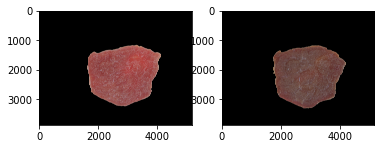

/content/drive/MyDrive/Carnes/imágenes_segmentadas/20210906_S01_2_c.PNG
/content/drive/MyDrive/Carnes/imágenes_segmentadas/20210910_S01_2_c.PNG


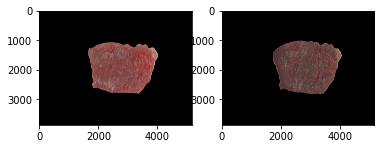

/content/drive/MyDrive/Carnes/imágenes_segmentadas/20210906_S01_3_c.PNG
/content/drive/MyDrive/Carnes/imágenes_segmentadas/20210910_S01_3_c.PNG


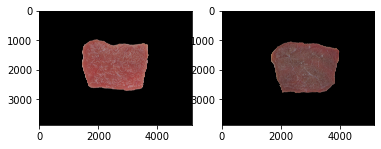

/content/drive/MyDrive/Carnes/imágenes_segmentadas/20210906_S01_4_c.PNG
/content/drive/MyDrive/Carnes/imágenes_segmentadas/20210910_S01_4_c.PNG


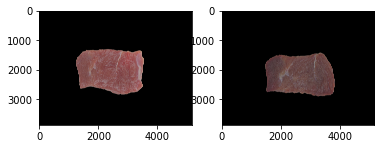

/content/drive/MyDrive/Carnes/imágenes_segmentadas/20210906_S01_5_c.PNG
/content/drive/MyDrive/Carnes/imágenes_segmentadas/20210910_S01_5_c.PNG


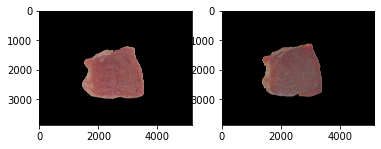

/content/drive/MyDrive/Carnes/imágenes_segmentadas/20210906_S01_6_c.PNG
/content/drive/MyDrive/Carnes/imágenes_segmentadas/20210910_S01_6_c.PNG


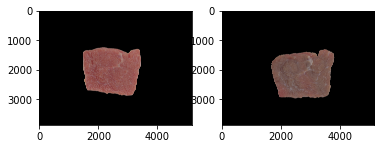

/content/drive/MyDrive/Carnes/imágenes_segmentadas/20210906_S01_7_c.PNG
/content/drive/MyDrive/Carnes/imágenes_segmentadas/20210910_S01_7_c.PNG


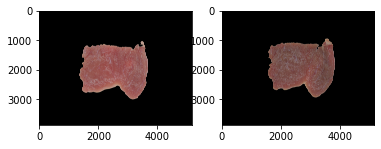

In [3]:
Xtrain = None
for i in range(1,8):
  # Extraer los colores de las carnes del día 1
  print('/content/drive/MyDrive/Carnes/imágenes_segmentadas/20210906_S01_' + str(i) + '_c.PNG')
  img = cv2.imread('/content/drive/MyDrive/Carnes/imágenes_segmentadas/20210906_S01_' + str(i) + '_c.PNG')
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  nrows,ncols,nch = img.shape
  hsvimg = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

  Ximg = np.reshape(img,(nrows*ncols,3))
  hsvXimg = np.reshape(hsvimg,(nrows*ncols,3))
  idx = np.logical_and.reduce((Ximg[:,0]!=0 ,Ximg[:,1]!=0,Ximg[:,2]!=0))
  redshsv = hsvXimg[idx]

  idx = np.random.permutation(len(redshsv))[:600]
  colorshsv = redshsv[idx,:]
  colorshsv[:,0] = RecorrerColor(colorshsv[:,0], 20)

  # Agregar los colores a Xtrain
  if Xtrain is not None:
    Xtrain = np.concatenate((Xtrain,colorshsv))
  else:
    Xtrain = colorshsv

  # Extraer los colores de las carnes del día 5
  print('/content/drive/MyDrive/Carnes/imágenes_segmentadas/20210910_S01_' + str(i) + '_c.PNG')
  img2 = cv2.imread('/content/drive/MyDrive/Carnes/imágenes_segmentadas/20210910_S01_' + str(i) + '_c.PNG')
  img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) 
  nrows,ncols,nch = img2.shape
  hsvimg = cv2.cvtColor(img2, cv2.COLOR_RGB2HSV)

  Ximg = np.reshape(img2,(nrows*ncols,3))
  hsvXimg = np.reshape(hsvimg,(nrows*ncols,3))
  idx = np.logical_and.reduce((Ximg[:,0]!=0 ,Ximg[:,1]!=0,Ximg[:,2]!=0))
  redshsv = hsvXimg[idx]

  idx = np.random.permutation(len(redshsv))[:600]
  colorshsv = redshsv[idx,:]
  colorshsv[:,0] = RecorrerColor(colorshsv[:,0], 20)

  # Agregar los colores a Xtrain
  Xtrain = np.concatenate((Xtrain,colorshsv))

  plt.figure()
  plt.subplot(1,2,1)
  plt.imshow(img)
  plt.subplot(1,2,2)
  plt.imshow(img2)
  plt.show()

#Generar Ytrain
aux = Xtrain.shape[0]//2
Ytrain = np.concatenate((np.ones(aux),np.zeros(aux)))

In [16]:
model = RandomForestClassifier(random_state = 0)
model.fit(Xtrain,Ytrain)

RandomForestClassifier(random_state=0)

/content/drive/MyDrive/Carnes/imágenes_segmentadas/20210906_S01_10_c.PNG


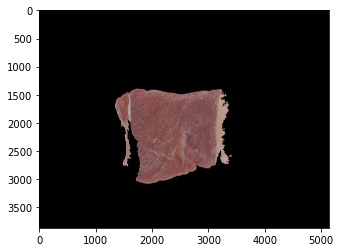

In [17]:
Xtest = None
i = 10
# Extraer los colores de las carnes
print('/content/drive/MyDrive/Carnes/imágenes_segmentadas/20210906_S01_' + str(i) + '_c.PNG')
img = cv2.imread('/content/drive/MyDrive/Carnes/imágenes_segmentadas/20210906_S01_' + str(i) + '_c.PNG')
#img = cv2.imread('/content/drive/MyDrive/Carnes/segmentadas_Sirloin_Fix/20210910_S01_' + str(i) + '_c.PNG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
nrows,ncols,nch = img.shape
hsvimg = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

Ximg = np.reshape(img,(nrows*ncols,3))
hsvXimg = np.reshape(hsvimg,(nrows*ncols,3))
idx = np.logical_and.reduce((Ximg[:,0]!=0 ,Ximg[:,1]!=0,Ximg[:,2]!=0))
redshsv = hsvXimg[idx]

idx = np.random.permutation(len(redshsv))[:600]
colorshsv = redshsv[idx,:]
colorshsv[:,0] = RecorrerColor(colorshsv[:,0], 20)

# Agregar los colores a Xtest
Xtest = colorshsv

plt.figure()
plt.imshow(img)
plt.show()

#Generar Ytest
aux = Xtest.shape[0]//2
Ytest = np.concatenate((np.ones(aux),np.zeros(aux)))

55.17 % of being day 1
44.83 % of being day 5



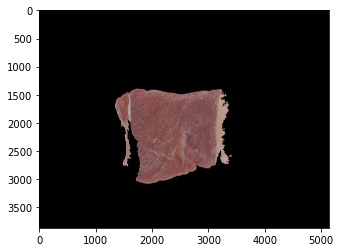

In [18]:

Predict = model.predict(Xtest)
count = (np.count_nonzero(Predict == 1))
percentage = np.round(count/Ytest.shape[0]*100,2)
print(percentage,"% of being day 1\n" + str(100 - percentage),"% of being day 5\n")
plt.figure()
plt.imshow(img)
plt.show()

In [5]:
print("TRAIN")
print(Xtrain.shape,Ytrain.shape)
print(Xtrain[5000],Ytrain[5000])
print(Xtrain[4200],Ytrain[4200])
print(Xtrain[4199],Ytrain[4199])
print("\nTEST")
print(Xtest.shape,Ytest.shape)
print(Xtest[500],Ytest[500])
print(Xtest[300],Ytest[300])
print(Xtest[299],Ytest[299])

TRAIN
(8400, 3) (8400,)
[ 18  98 145] 0.0
[ 25 103 119] 0.0
[ 22 114 166] 1.0

TEST
(600, 3) (600,)
[ 21  99 155] 0.0
[ 24 100 155] 0.0
[ 20 109 154] 1.0


34.33 % of being day 1
65.67 % of being day 5



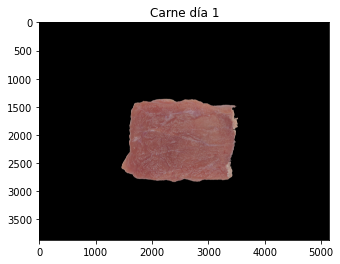

48.67 % of being day 1
51.33 % of being day 5



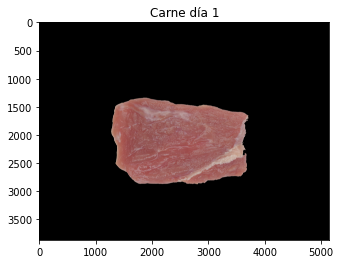

56.67 % of being day 1
43.33 % of being day 5



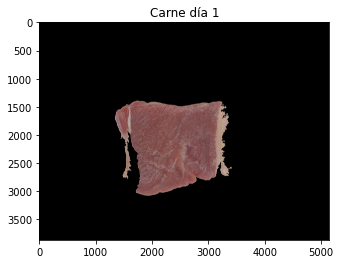

35.67 % of being day 1
64.33 % of being day 5



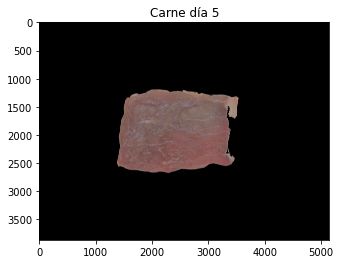

27.5 % of being day 1
72.5 % of being day 5



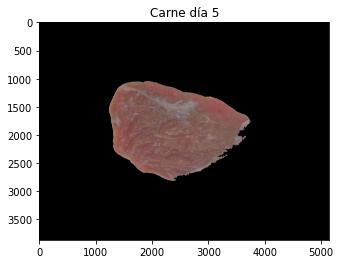

26.67 % of being day 1
73.33 % of being day 5



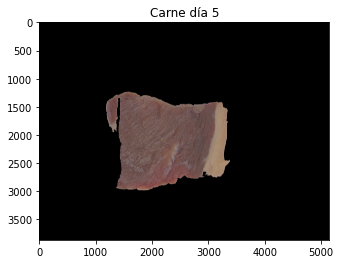

In [19]:
for i in range(8,11):
  # Extraer los colores de las carnes del día 1
  #print('/content/drive/MyDrive/Carnes/segmentadas_Sirloin_Fix/20210906_S01_' + str(i) + '_c.PNG')
  img = cv2.imread('/content/drive/MyDrive/Carnes/imágenes_segmentadas/20210906_S01_' + str(i) + '_c.PNG')
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  nrows,ncols,nch = img.shape
  hsvimg = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

  Ximg = np.reshape(img,(nrows*ncols,3))
  hsvXimg = np.reshape(hsvimg,(nrows*ncols,3))
  idx = np.logical_and.reduce((Ximg[:,0]!=0 ,Ximg[:,1]!=0,Ximg[:,2]!=0))
  redshsv = hsvXimg[idx]

  idx = np.random.permutation(len(redshsv))[:600]
  colorshsv = redshsv[idx,:]
  colorshsv[:,0] = RecorrerColor(colorshsv[:,0], 20)

  # Agregar los colores a Xtest
  Xtest = colorshsv

  # Generar Ytest
  aux = Xtest.shape[0]//2
  Ytest = np.concatenate((np.ones(aux),np.zeros(aux)))

  # Hacer la predicción
  Predict = model.predict(Xtest)
  count = (np.count_nonzero(Predict == 1))
  percentage = np.round(count/Ytest.shape[0]*100,2)
  print(percentage,"% of being day 1\n" + str(100 - percentage),"% of being day 5\n")
  plt.figure()
  plt.title("Carne día 1")
  plt.imshow(img)
  plt.show()

for i in range(8,11):
  # Extraer los colores de las carnes del día 5
  #print('/content/drive/MyDrive/Carnes/segmentadas_Sirloin_Fix/20210910_S01_' + str(i) + '_c.PNG')
  img = cv2.imread('/content/drive/MyDrive/Carnes/imágenes_segmentadas/20210910_S01_' + str(i) + '_c.PNG')
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  nrows,ncols,nch = img.shape
  hsvimg = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

  Ximg = np.reshape(img,(nrows*ncols,3))
  hsvXimg = np.reshape(hsvimg,(nrows*ncols,3))
  idx = np.logical_and.reduce((Ximg[:,0]!=0 ,Ximg[:,1]!=0,Ximg[:,2]!=0))
  redshsv = hsvXimg[idx]

  idx = np.random.permutation(len(redshsv))[:600]
  colorshsv = redshsv[idx,:]
  colorshsv[:,0] = RecorrerColor(colorshsv[:,0], 20)

  # Agregar los colores a Xtest
  Xtest = colorshsv

  # Generar Ytest
  aux = Xtest.shape[0]//2
  Ytest = np.concatenate((np.ones(aux),np.zeros(aux)))

  # Hacer la predicción
  Predict = model.predict(Xtest)
  count = (np.count_nonzero(Predict == 1))
  percentage = np.round(count/Ytest.shape[0]*100,2)
  print(percentage,"% of being day 1\n" + str(100 - percentage),"% of being day 5\n")
  plt.figure()
  plt.title("Carne día 5")
  plt.imshow(img)
  plt.show()